In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn import pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML


In [3]:
df= pd.read_csv("LD.csv")
df

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [4]:
df.shape

(10337, 2)

In [5]:
df.drop(df[df.duplicated()].index, axis=0, inplace=True)
df.shape

(10271, 2)

In [6]:
df["Language"].nunique()

17

In [7]:
#check xem có bao nhiêu ngôn ngữ được train
df["Language"].value_counts()

Language
English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: count, dtype: int64

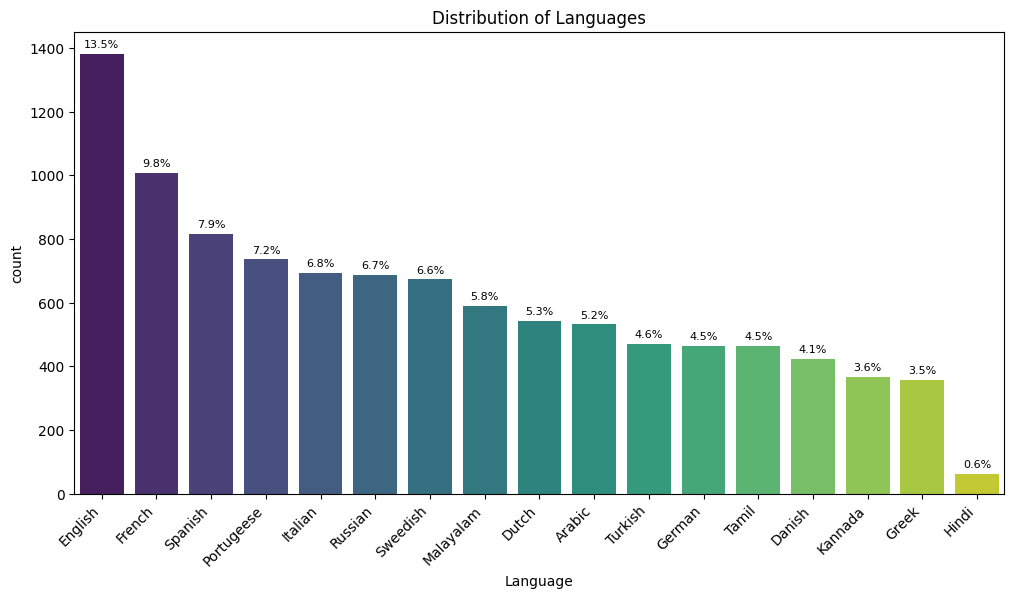

In [8]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Language', data=df, palette='viridis', order=df['Language'].value_counts().index)
plt.title('Distribution of Languages')
plt.xticks(rotation=45, ha='right')

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 20
    ax.text(x, y, percentage, ha='center', fontsize=8)
plt.show()

In [9]:
data= df.copy()
data['Cleaned_Text']= ""
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [10]:
import re
def clean_function(Text):
    # xóa các kí tự số và các kí tự đặc biệt
    Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)

    Text = Text.lower()
    Text = re.sub('http\S+\s*', ' ', Text)
    Text = re.sub('RT|cc', ' ', Text)
    Text = re.sub('#\S+', '', Text)
    Text = re.sub('@\S+', '  ', Text)
    Text = re.sub('\s+', ' ', Text)

    return Text

In [11]:
data['Cleaned_Text'] = data['Text'].apply(lambda x: clean_function(x))
data

,Text,Language,Cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural p...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phys...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the only...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human activ...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old fren...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


In [12]:
X= data["Cleaned_Text"]
y= data["Language"]

In [13]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
y= encoder.fit_transform(y)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Vector hóa văn bảng
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Mô hình Naive Bayes

Best Parameters: {'alpha': 0.1}
Accuracy: 0.964963503649635
Precision: 0.970041698303937
Recall: 0.964963503649635
F1 Score: 0.9657283133817962
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       121
           1       0.99      0.98      0.98        85
           2       1.00      0.94      0.97       108
           3       0.83      1.00      0.90       290
           4       0.99      0.98      0.98       210
           5       0.99      0.99      0.99        86
           6       1.00      0.95      0.98        65
           7       1.00      1.00      1.00         8
           8       1.00      0.95      0.97       130
           9       1.00      0.96      0.98        70
          10       1.00      0.99      1.00       122
          11       0.98      0.96      0.97       139
          12       1.00      0.96      0.98       119
          13       0.98      0.97      0.97       160
          14       0.9

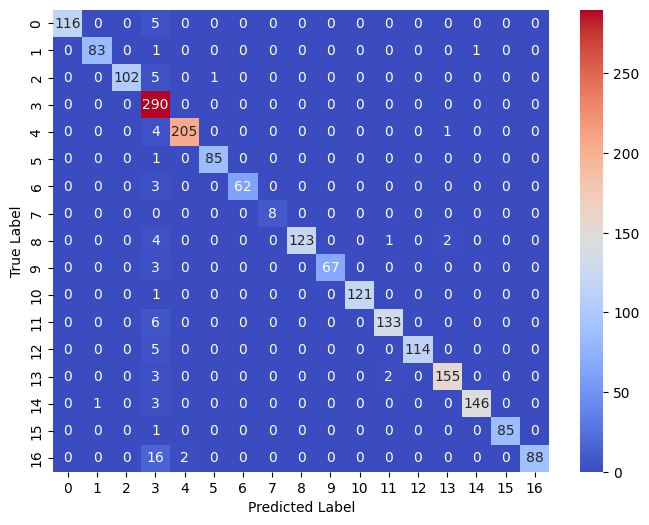

In [57]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]  # Tuning the smoothing parameter
}

# Tạo GridSearchCV
grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:\n{classification_report_str}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print('\n' + '='*50 + '\n')

Mô hình RandomForest

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       121
           1       0.94      0.93      0.93        85
           2       0.96      0.91      0.93       108
           3       0.98      0.97      0.97       290
           4       0.99      0.91      0.95       210
           5       0.95      0.95      0.95        86
           6       1.00      0.95      0.98        65
           7       1.00      0.88      0.93         8
           8       0.97      0.92      0.94       130
           9       1.00      0.96      0.98        70
          10       1.00      0.95      0.97       122
          11       0.97      0.91      0.94       139
          12       1.00      0.95      0.97       119
          13       0.89      0.94      0.92       160
          14       0.97  

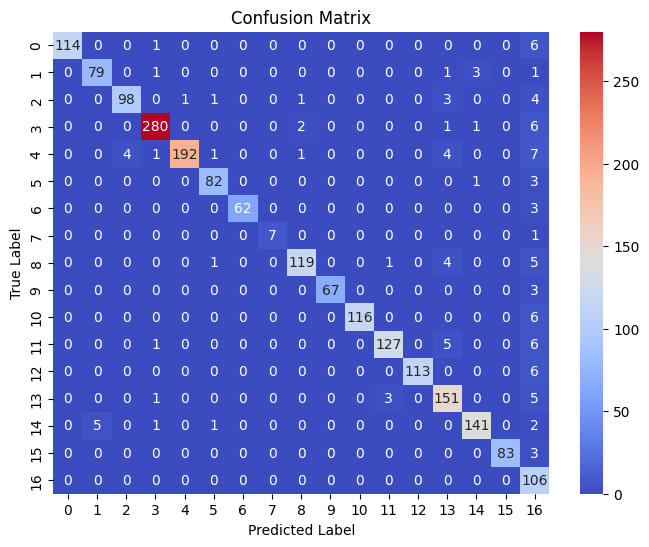

In [25]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10]  # Số mẫu tối thiểu cần thiết để chia nút
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test_tfidf)

# Đánh giá mô hình với các chỉ số bổ sung
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Classification Report:\n{classification_report_str}')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print('\n' + '='*50 + '\n')

Mô hình CNN

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


# Xây dựng mô hình CNN
best_model = Sequential()
best_model.add(Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)))
best_model.add(Dropout(0.5))
best_model.add(Dense(64, activation='relu'))
best_model.add(Dropout(0.5))
best_model.add(Dense(len(encoder.classes_), activation='softmax')) #dua chuoi ve dung so nhan ban dau de kiem tra

best_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = best_model.fit(X_train_tfidf, y_train, epochs=10, batch_size=4, validation_split=0.2)
loss, accuracy = best_model.evaluate(X_test_tfidf, y_test)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')


Epoch 1/10
1643/1643 [==============================] - 16s 9ms/step - loss: 1.1717 - accuracy: 0.6872 - val_loss: 0.2202 - val_accuracy: 0.9532
Epoch 2/10
1643/1643 [==============================] - 16s 10ms/step - loss: 0.2683 - accuracy: 0.9378 - val_loss: 0.1518 - val_accuracy: 0.9605
Epoch 3/10
1643/1643 [==============================] - 15s 9ms/step - loss: 0.1740 - accuracy: 0.9568 - val_loss: 0.1362 - val_accuracy: 0.9672
Epoch 4/10
1643/1643 [==============================] - 15s 9ms/step - loss: 0.1415 - accuracy: 0.9641 - val_loss: 0.1397 - val_accuracy: 0.9629
Epoch 5/10
1643/1643 [==============================] - 15s 9ms/step - loss: 0.1261 - accuracy: 0.9670 - val_loss: 0.1303 - val_accuracy: 0.9665
Epoch 6/10
1643/1643 [==============================] - 15s 9ms/step - loss: 0.1117 - accuracy: 0.9691 - val_loss: 0.1350 - val_accuracy: 0.9617
Epoch 7/10
1643/1643 [==============================] - 14s 9ms/step - loss: 0.1114 - accuracy: 0.9690 - val_loss: 0.1380 - val_a

Hàm in cho 2 model naive bayes và randomForest

In [58]:
# hàm in ra dự đoán
def predict(text):
    text_tfidf = tfidf_vectorizer.transform([text]).toarray()
    lang = best_model.predict(text_tfidf)
    language = encoder.inverse_transform(lang)[0]
    print('The Language is in', language)

Hàm in cho CNN

In [50]:
def predict(text):
    text_tfidf = tfidf_vectorizer.transform([text]).toarray()  # Chuyển sang dạng TF-IDF
    predictions = best_model.predict(text_tfidf)  # Dự đoán nhãn
    predicted_class = np.argmax(predictions, axis=1)
    language = encoder.inverse_transform(predicted_class)  # Chuyển đổi chỉ số thành nhãn
    return language[0]

In [59]:
# English
predict("Hello iam a boy")

The Language is in English
